In [1]:
%store -r import_all_libs

In [2]:
import_all_libs

In [40]:
from datetime import date
import gc
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from tqdm import tqdm

In [33]:
cen_exp = pd.read_csv('/home/tuts/datasets/uspvsufmg/cenarios_expansao.csv')
ljs_atuais = pd.read_csv('/home/tuts/datasets/uspvsufmg/lojas_atuais.csv')

ibge = pd.read_excel('../ikeda/data/ibge.xls')

In [5]:
ibge.head()

,UF,Nome_UF,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Código Município Completo,Nome_Município
0,11,Rondônia,2,Leste Rondoniense,6,Cacoal,15,1100015,Alta Floresta D'Oeste
1,11,Rondônia,2,Leste Rondoniense,6,Cacoal,379,1100379,Alto Alegre dos Parecis
2,11,Rondônia,2,Leste Rondoniense,3,Ariquemes,403,1100403,Alto Paraíso
3,11,Rondônia,2,Leste Rondoniense,5,Alvorada D'Oeste,346,1100346,Alvorada D'Oeste
4,11,Rondônia,2,Leste Rondoniense,3,Ariquemes,23,1100023,Ariquemes


In [6]:
ibge.shape

(5570, 9)

In [7]:
ibge['Microrregião Geográfica'].value_counts()

4     274
1     268
3     262
10    240
2     240
     ... 
49     16
59     15
66     14
42     14
45     12
Name: Microrregião Geográfica, Length: 66, dtype: int64

In [8]:
ibge['Município'].value_counts()

1209     4
3007     4
2504     4
807      4
609      4
        ..
12456    1
9159     1
15304    1
4260     1
22525    1
Name: Município, Length: 4307, dtype: int64

In [9]:
cen_exp.head()

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
0,10,2933307005008,2933307,FEATURE_01_VALUE_08,FEATURE_02_VALUE_02,False,50.00,FEATURE_05_VALUE_03,6,0.13,0.13,116.19,2.91,FEATURE_11_VALUE_01,FEATURE_12_VALUE_01,100.00,93.40,100.00,100.00,71.70,88.80
1,13,2916401003002,2916401,FEATURE_01_VALUE_10,FEATURE_02_VALUE_04,False,41.00,FEATURE_05_VALUE_03,4,0.12,0.11,26.35,1.31,NaN,NaN,84.30,77.50,100.00,100.00,63.50,78.80
2,16,2928703003003,2928703,NaN,FEATURE_02_VALUE_04,False,42.12,FEATURE_05_VALUE_05,2,0.10,0.09,35.36,1.97,NaN,NaN,nan,nan,nan,nan,nan,nan
3,21,2906006003001,2906006,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,6,0.13,0.13,9.86,1.38,NaN,NaN,85.00,76.90,100.00,100.00,100.00,92.90
4,28,3550308005058,3550308,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,True,44.31,FEATURE_05_VALUE_03,8,0.19,0.18,5593.91,2.82,FEATURE_11_VALUE_02,FEATURE_12_VALUE_01,nan,nan,nan,nan,nan,nan


In [10]:
cen_exp.shape

(553, 21)

In [11]:
ibge.rename(columns={'Código Município Completo': 'cod_municipio'}, inplace=True)

In [12]:
cen_exp_ibge = cen_exp.merge(ibge, how='outer', on='cod_municipio')
cen_exp_ibge.head()

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,UF,Nome_UF,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Nome_Município
0,10.00,2933307005008.00,2933307,FEATURE_01_VALUE_08,FEATURE_02_VALUE_02,False,50.00,FEATURE_05_VALUE_03,6.00,0.13,0.13,116.19,2.91,FEATURE_11_VALUE_01,FEATURE_12_VALUE_01,100.00,93.40,100.00,100.00,71.70,88.80,29.00,Bahia,6.00,Centro Sul Baiano,28.00,Vitória da Conquista,33307.00,Vitória da Conquista
1,3213.00,2933307005008.00,2933307,NaN,FEATURE_02_VALUE_02,False,29.50,FEATURE_05_VALUE_02,5.00,0.13,0.13,116.19,2.91,FEATURE_11_VALUE_01,FEATURE_12_VALUE_01,88.00,99.40,100.00,100.00,75.90,88.00,29.00,Bahia,6.00,Centro Sul Baiano,28.00,Vitória da Conquista,33307.00,Vitória da Conquista
2,13.00,2916401003002.00,2916401,FEATURE_01_VALUE_10,FEATURE_02_VALUE_04,False,41.00,FEATURE_05_VALUE_03,4.00,0.12,0.11,26.35,1.31,NaN,NaN,84.30,77.50,100.00,100.00,63.50,78.80,29.00,Bahia,6.00,Centro Sul Baiano,29.00,Itapetinga,16401.00,Itapetinga
3,16.00,2928703003003.00,2928703,NaN,FEATURE_02_VALUE_04,False,42.12,FEATURE_05_VALUE_05,2.00,0.10,0.09,35.36,1.97,NaN,NaN,nan,nan,nan,nan,nan,nan,29.00,Bahia,5.00,Metropolitana de Salvador,20.00,Santo Antônio de Jesus,28703.00,Santo Antônio de Jesus
4,21.00,2906006003001.00,2906006,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,6.00,0.13,0.13,9.86,1.38,NaN,NaN,85.00,76.90,100.00,100.00,100.00,92.90,29.00,Bahia,3.00,Centro Norte Baiano,8.00,Senhor do Bonfim,6006.00,Campo Formoso


In [13]:
cen_exp_ibge.Nome_UF.value_counts()

Minas Gerais           871
São Paulo              712
Rio Grande do Sul      506
Bahia                  428
Paraná                 412
Santa Catarina         298
Goiás                  249
Paraíba                224
Piauí                  224
Maranhão               218
Pernambuco             191
Ceará                  187
Rio Grande do Norte    169
Pará                   148
Mato Grosso            142
Tocantins              139
Rio de Janeiro         107
Alagoas                103
Espírito Santo          83
Mato Grosso do Sul      79
Sergipe                 77
Amazonas                62
Rondônia                52
Acre                    22
Amapá                   16
Roraima                 15
Distrito Federal         4
Name: Nome_UF, dtype: int64

In [14]:
cen_exp_ibge['Mesorregião Geográfica'].value_counts()

1.00     1180
3.00      920
2.00      830
4.00      714
5.00      473
6.00      391
7.00      327
10.00     227
8.00      188
12.00     182
15.00      91
9.00       85
11.00      72
13.00      41
14.00      17
Name: Mesorregião Geográfica, dtype: int64

In [15]:
cen_exp_ibge['Microrregião Geográfica'].value_counts()

4.00     275
1.00     271
3.00     262
10.00    243
2.00     241
        ... 
59.00     16
49.00     16
42.00     14
66.00     14
45.00     12
Name: Microrregião Geográfica, Length: 66, dtype: int64

In [16]:
cen_exp_ibge['Município'].value_counts()

50308.00    41
4557.00     13
6200.00     11
6902.00     10
27408.00    10
            ..
25003.00     1
50307.00     1
50505.00     1
29509.00     1
19002.00     1
Name: Município, Length: 4307, dtype: int64

In [17]:
cen_exp_ibge['Município'].isna().sum()

30

In [18]:
cen_exp_ibge.shape

(5768, 29)

In [19]:
X = cen_exp[['feature_06', 'feature_07', 'feature_08']]
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)

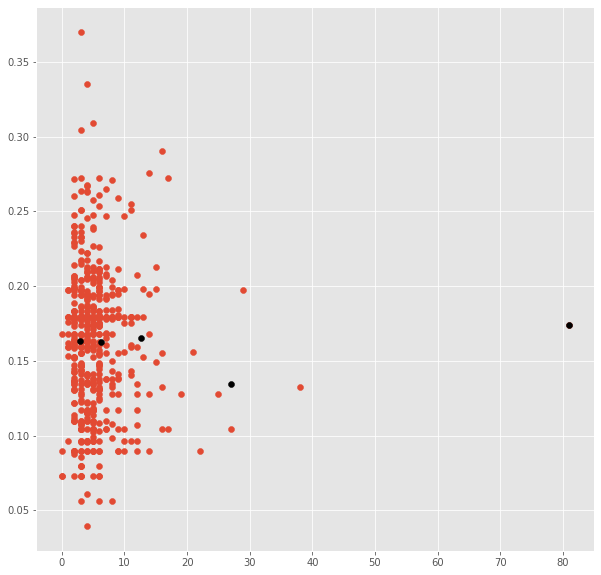

In [20]:
center = kmeans.cluster_centers_
plt.figure(figsize=(10,10))
# plt.scatter(X['feature_06'], X['feature_07'])
# plt.scatter(center[:, 0], center[:, 1], cmap='cividis', c='black')

plt.scatter(X['feature_06'], X['feature_08'])
plt.scatter(center[:, 0], center[:, 2], cmap='cividis', c='black')

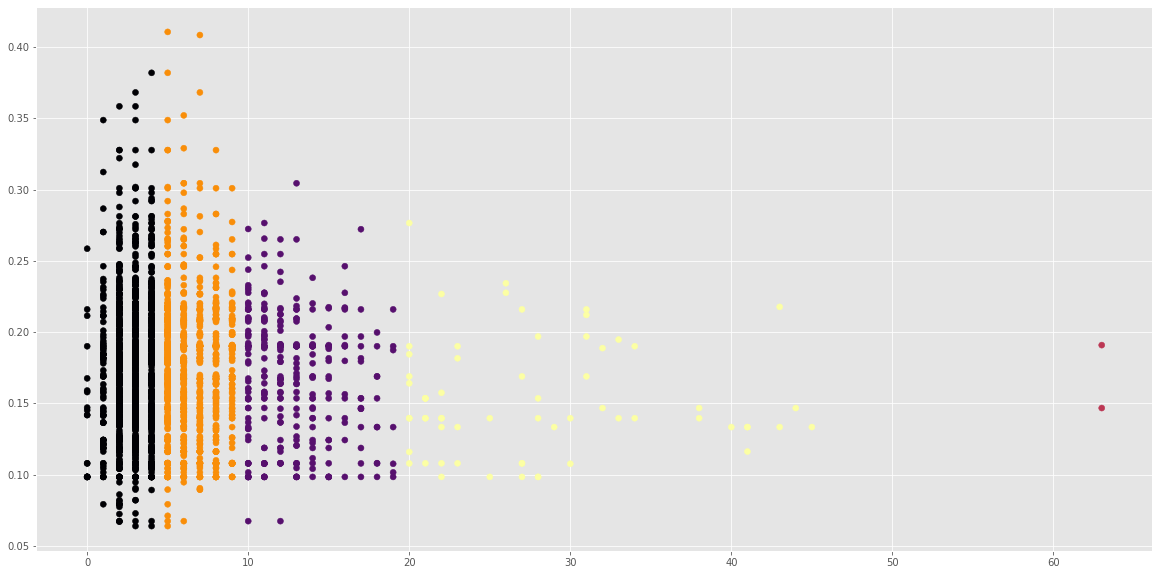

In [21]:
y_result = kmeans.predict(ljs_atuais[['feature_06', 'feature_07', 'feature_08']])
plt.figure(figsize=(20,10))
plt.scatter(ljs_atuais['feature_06'], ljs_atuais['feature_07'], cmap='inferno', c=y_result);

In [26]:
ljs_atuais.isna().sum()

cod_loja            0
cod_ap              0
cod_municipio       0
feature_01       1959
feature_02          0
feature_03          0
feature_04          0
feature_05          0
feature_06          0
feature_07          0
feature_08          0
feature_09          0
feature_10          0
feature_11       2885
feature_12       2885
feature_13       2256
feature_14       2256
feature_15       2256
feature_16       2256
feature_17       2256
feature_18       2256
dtype: int64

In [27]:
cen_exp.isna().sum()

cod_loja           0
cod_ap             0
cod_municipio      0
feature_01       364
feature_02         0
feature_03         0
feature_04         0
feature_05         0
feature_06         0
feature_07         0
feature_08         0
feature_09         0
feature_10         0
feature_11       512
feature_12       512
feature_13       394
feature_14       394
feature_15       394
feature_16       394
feature_17       394
feature_18       394
dtype: int64

In [28]:
ljs_atuais.dropna(axis=0, inplace=True)
cen_exp.dropna(axis=0, inplace=True)

In [34]:
ljs_atuais.shape

(3130, 21)

In [35]:
cen_exp.shape

(553, 21)

In [70]:
columns_in_common = set(ljs_atuais.columns).intersection(set(cen_exp.columns)) - set(['feature_01','feature_11', 
                                                                                      'feature_12', 'feature_13',
                                                                                      'feature_14', 'feature_15', 
                                                                                      'feature_16', 'feature_17', 
                                                                                      'feature_18'])
columns_in_common

{'cod_ap',
 'cod_loja',
 'cod_municipio',
 'feature_02',
 'feature_03',
 'feature_04',
 'feature_05',
 'feature_06',
 'feature_07',
 'feature_08',
 'feature_09',
 'feature_10'}

In [71]:
X = cen_exp[list(columns_in_common)]
ljs_common = ljs_atuais[list(columns_in_common)]

In [72]:
X = pd.concat([X, pd.get_dummies(X.feature_02)], axis=1)
X = pd.concat([X, pd.get_dummies(X.feature_05)], axis=1)

ljs_common = pd.concat([ljs_common, pd.get_dummies(ljs_common.feature_02)], axis=1)
ljs_common = pd.concat([ljs_common, pd.get_dummies(ljs_common.feature_05)], axis=1)

In [73]:
X.drop('feature_02', axis=1, inplace=True)
X.drop('feature_05', axis=1, inplace=True)

ljs_common.drop('feature_02', axis=1, inplace=True)
ljs_common.drop('feature_05', axis=1, inplace=True)

In [74]:
X.head()

,feature_07,cod_ap,cod_loja,feature_06,feature_03,feature_10,feature_04,cod_municipio,feature_08,feature_09,FEATURE_02_VALUE_02,FEATURE_02_VALUE_03,FEATURE_02_VALUE_04,FEATURE_02_VALUE_06,FEATURE_05_VALUE_01,FEATURE_05_VALUE_02,FEATURE_05_VALUE_03,FEATURE_05_VALUE_04,FEATURE_05_VALUE_05,FEATURE_05_VALUE_06,FEATURE_05_VALUE_07
0,0.13,2933307005008,10,6,False,2.91,50.00,2933307,0.13,116.19,1,0,0,0,0,0,1,0,0,0,0
1,0.12,2916401003002,13,4,False,1.31,41.00,2916401,0.11,26.35,0,0,1,0,0,0,1,0,0,0,0
2,0.10,2928703003003,16,2,False,1.97,42.12,2928703,0.09,35.36,0,0,1,0,0,0,0,0,1,0,0
3,0.13,2906006003001,21,6,False,1.38,30.00,2906006,0.13,9.86,0,0,1,0,0,0,1,0,0,0,0
4,0.19,3550308005058,28,8,True,2.82,44.31,3550308,0.18,5593.91,1,0,0,0,0,0,1,0,0,0,0


In [75]:
ljs_common.head()

,feature_07,cod_ap,cod_loja,feature_06,feature_03,feature_10,feature_04,cod_municipio,feature_08,feature_09,FEATURE_02_VALUE_02,FEATURE_02_VALUE_03,FEATURE_02_VALUE_04,FEATURE_02_VALUE_06,FEATURE_05_VALUE_01,FEATURE_05_VALUE_02,FEATURE_05_VALUE_03,FEATURE_05_VALUE_04,FEATURE_05_VALUE_05,FEATURE_05_VALUE_06,FEATURE_05_VALUE_07,FEATURE_05_VALUE_08
0,0.17,4125506005002,1,31,True,2.35,21.76,4125506,0.17,115.96,0,0,1,0,0,0,0,1,0,0,0,0
1,0.22,5300108005004,2,27,True,3.67,22.00,5300108,0.20,1562.67,0,1,0,0,0,0,1,0,0,0,0,0
2,0.19,3550308005052,3,6,True,2.82,45.66,3550308,0.18,5593.91,0,1,0,0,0,0,1,0,0,0,0,0
3,0.14,3145604003002,4,3,False,7.22,30.00,3145604,0.14,12.82,0,0,1,0,0,0,1,0,0,0,0,0
4,0.11,1600303005010,5,30,False,1.97,62.49,1600303,0.10,325.53,1,0,0,0,0,0,1,0,0,0,0,0


In [76]:
columns_in_common = set(ljs_common.columns).intersection(set(X.columns))
columns_in_common

{'FEATURE_02_VALUE_02',
 'FEATURE_02_VALUE_03',
 'FEATURE_02_VALUE_04',
 'FEATURE_02_VALUE_06',
 'FEATURE_05_VALUE_01',
 'FEATURE_05_VALUE_02',
 'FEATURE_05_VALUE_03',
 'FEATURE_05_VALUE_04',
 'FEATURE_05_VALUE_05',
 'FEATURE_05_VALUE_06',
 'FEATURE_05_VALUE_07',
 'cod_ap',
 'cod_loja',
 'cod_municipio',
 'feature_03',
 'feature_04',
 'feature_06',
 'feature_07',
 'feature_08',
 'feature_09',
 'feature_10'}

In [78]:
X = X[list(columns_in_common)]
ljs_common = ljs_common[list(columns_in_common)]

In [82]:
n_clusters = range(3, 100)
models = list()
scores = list()
for n_cluster in tqdm(n_clusters):
    kmeans = KMeans(n_clusters=n_cluster)
    models.append(kmeans)
    kmeans.fit(X)
    y_hat = kmeans.predict(ljs_common)
    sscore = silhouette_score(ljs_common, y_hat)
    scores.append(sscore)

100%|██████████| 97/97 [03:08<00:00,  1.94s/it]


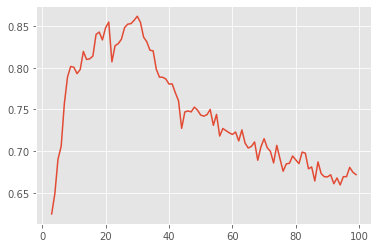

In [83]:
plt.plot(n_clusters, scores);

In [84]:
max(scores)

0.861675431432882

In [87]:
scores = np.array(scores)

In [89]:
scores.argmax()

27

In [90]:
models[27]

KMeans(n_clusters=30)

In [91]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X)
y_hat = kmeans.predict(ljs_common)
y_hat

array([ 1, 25,  6, ...,  1, 27, 14], dtype=int32)

In [92]:
y_hat = pd.Series(y_hat)
y_hat

0        1
1       25
2        6
3       16
4       28
        ..
3125    15
3126     2
3127     1
3128    27
3129    14
Length: 3130, dtype: int32

In [96]:
y_hat.value_counts()

6     425
27    229
1     188
19    179
9     175
4     175
10    171
0     151
16    140
8     139
2     137
14    119
21    115
3      97
20     73
5      68
17     62
12     60
15     59
23     53
26     53
29     43
22     43
7      41
25     35
18     31
11     31
13     18
28     12
24      8
dtype: int64

In [94]:
y_hatX = pd.Series(kmeans.predict(X))
y_hatX

0      10
1      10
2      10
3      10
4       6
       ..
548    10
549     0
550     3
551    14
552    10
Length: 553, dtype: int32

In [95]:
y_hatX.value_counts()

6     73
1     40
16    37
9     37
10    37
27    34
0     30
19    30
4     28
8     25
2     22
14    20
3     17
17    16
20    14
5     14
21    14
12    11
15    10
22     8
18     7
23     6
13     5
7      4
25     4
11     3
26     3
24     2
28     1
29     1
dtype: int64

In [99]:
cen_exp_cluster = pd.concat([cen_exp, y_hatX], axis=1)

In [100]:
ljs_atuais_cluster = pd.concat([ljs_atuais, y_hat], axis=1)

In [101]:
cen_exp_cluster.to_csv('/home/tuts/repos/others/usp-vs-ufmg/tutss/cen_exp_cluster.csv', index=False)
ljs_atuais_cluster.to_csv('/home/tuts/repos/others/usp-vs-ufmg/tutss/ljs_atuais_cluster.csv', index=False)